In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/bank-full.csv')

In [ ]:
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [ ]:
data.shape

(45211, 1)

In [ ]:
# Upon studying the dataframe I imported, due to the delimiter being a semicolon and not a comma, it was squeezing all the data in one row. So I fixed that here

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/bank-full.csv', sep=';')

In [ ]:
data.shape

(45211, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Starting preprocessing and feature engineering
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Checking to see how many unique values there are in each feature/column
for column in data.columns:
    num_unique = data[column].nunique()
    print(f"Column '{column}': {num_unique} unique values")

Column 'age': 77 unique values
Column 'job': 12 unique values
Column 'marital': 3 unique values
Column 'education': 4 unique values
Column 'default': 2 unique values
Column 'balance': 7168 unique values
Column 'housing': 2 unique values
Column 'loan': 2 unique values
Column 'contact': 3 unique values
Column 'day': 31 unique values
Column 'month': 12 unique values
Column 'duration': 1573 unique values
Column 'campaign': 48 unique values
Column 'pdays': 559 unique values
Column 'previous': 41 unique values
Column 'poutcome': 4 unique values
Column 'y': 2 unique values


In [ ]:
# Changing columns with binary values, and remapping them to 1s and 0s
binary_columns = ['default', 'housing', 'loan', 'y']
for column in binary_columns:
    data[column] = data[column].map({'yes': 1, 'no': 0})

In [ ]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
# Now seeing if all features are necessary
data.drop('contact', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 5.5+ MB


In [ ]:
data.drop('poutcome', axis=1, inplace=True)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,17,nov,508,4,-1,0,0


In [ ]:
data.shape

(45211, 15)

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Now hot enconding all remaining columns that do not contain a number
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'month']
encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=int)

In [ ]:
encoded_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Now going to do a correlation matrix to see the correlation of all the features
correlation_matrix = encoded_data.corr()
correlation_matrix

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,...,0.022872,-0.001198,-0.007466,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,...,-0.009344,-0.009027,-0.006990,0.044257,0.007582,-0.013991,-0.002946,0.006129,-0.017454,-0.013953
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,...,0.021594,-0.003537,-0.024421,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,...,-0.050556,-0.064523,-0.066448,-0.061231,-0.102298,-0.066284,0.427980,0.001152,-0.085439,-0.076343
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,...,-0.020459,-0.008842,-0.004450,0.167764,-0.022749,-0.029761,-0.027867,0.019154,-0.030097,-0.033663
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,...,-0.011368,-0.283326,0.250523,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,...,0.019057,-0.009557,0.006989,0.016163,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,...,-0.012635,-0.030747,-0.063064,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,...,0.047236,0.071023,0.049509,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,...,0.036628,0.065243,0.047004,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990


<Axes: >

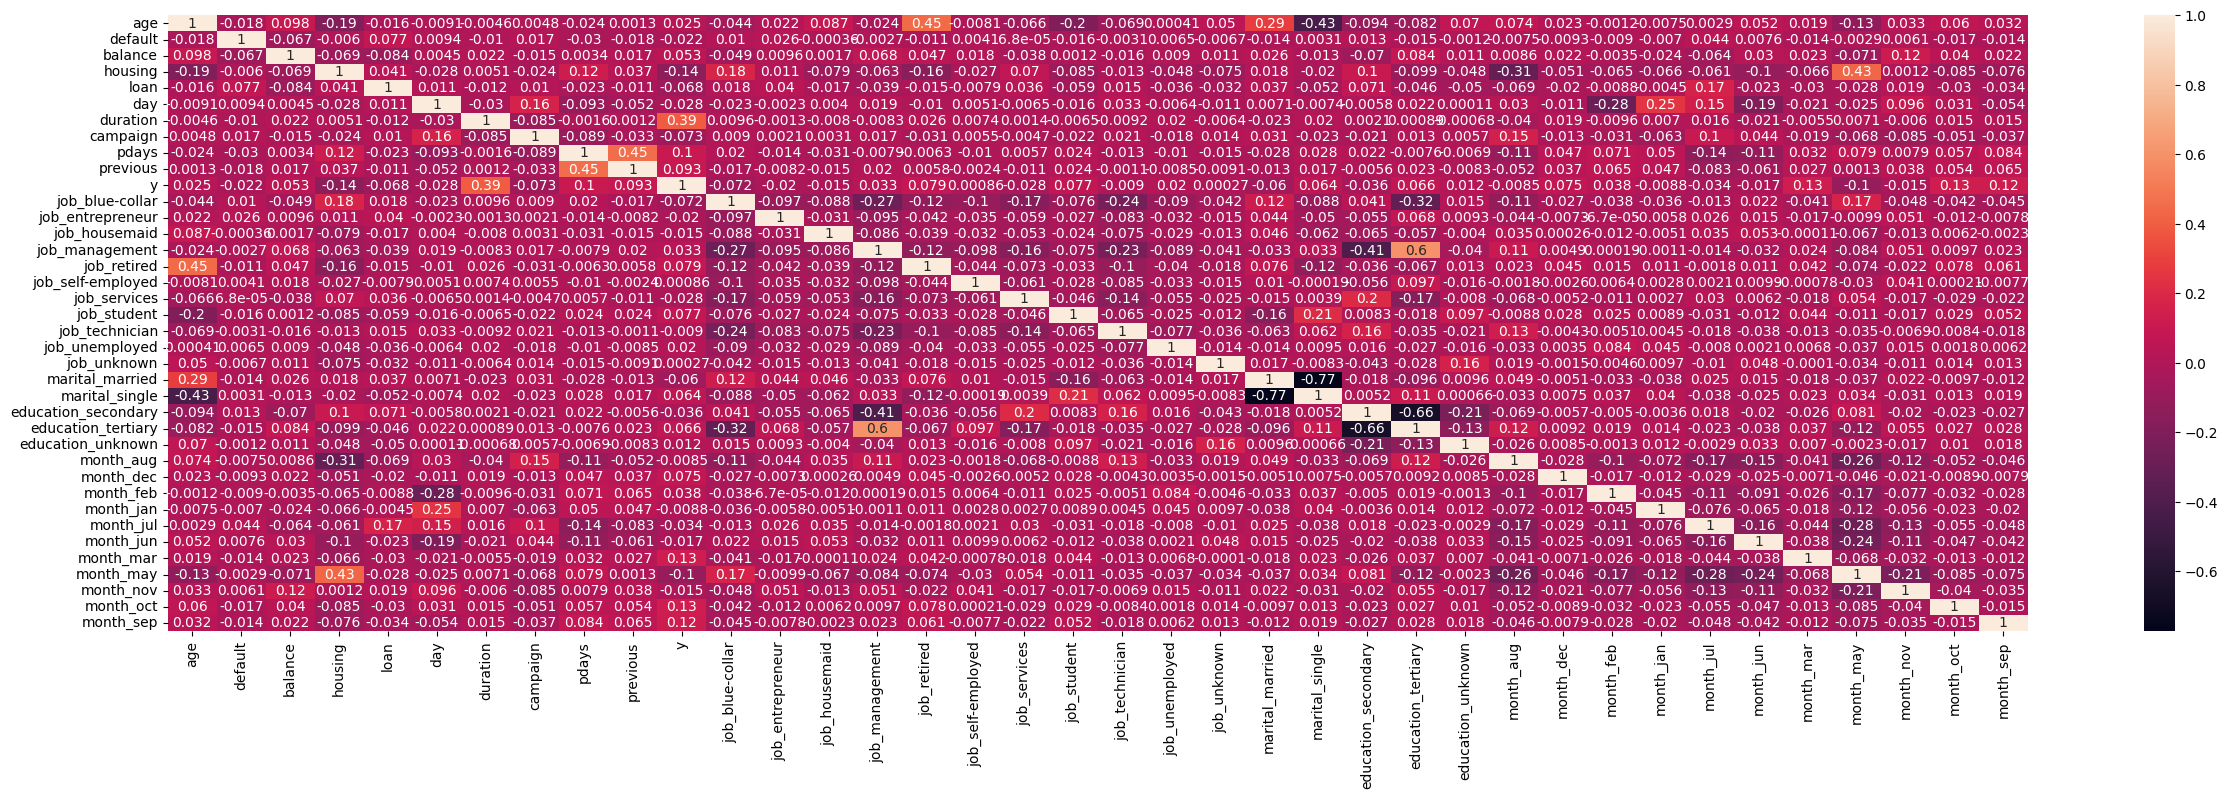

In [ ]:
# Adding a heatmap to the matrix
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
# Now splitting the coloumns into features and label
features = encoded_data.drop('y', axis=1)
label = encoded_data['y']

In [ ]:
# Now going to split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state = 424)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators':[5, 10, 20, 50, 100],
    'criterion':['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf':[1, 2, 3, 4]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [5, 10, 20, 50, 100]})

In [ ]:
# Seeing which grid serach parameter combination had the best result
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
grid_search.best_score_

0.9000530434165823

Text(50.722222222222214, 0.5, 'Actual')

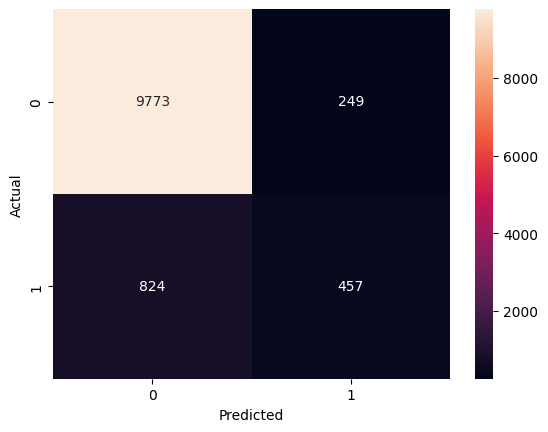

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Now I'm going to evaluate the random forest model
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6407035175879398
Recall: 0.3981264637002342
F1 Score: 0.49109292248435243


In [ ]:
precision_NotPlaced_Positive= make_scorer(precision_score, pos_label=0)

In [ ]:
print(precision_NotPlaced_Positive)

make_scorer(precision_score, response_method='predict', pos_label=0)


In [ ]:
precision_NotPlaced_Positive(grid_search.best_estimator_, X_test, y_test)

0.9266203483392025

In [ ]:
grid_search.score(X_test, y_test)

0.9064850039812439

In [ ]:
# I Got terrible scores, so now retraining with some differect hyperparameters in the grid search
parameters = {
    'n_estimators':[20, 50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_depth': [6, 8, 12, None],
    'min_samples_split': [4, 8, 10],
    'min_samples_leaf':[2, 4, 6]
}

grid_search2 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, cv = 5)

grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 12, None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 8, 10],
                         'n_estimators': [20, 50, 100, 200]})

In [ ]:
grid_search2.score(X_test, y_test)

0.9052463947624525

Text(50.722222222222214, 0.5, 'Actual')

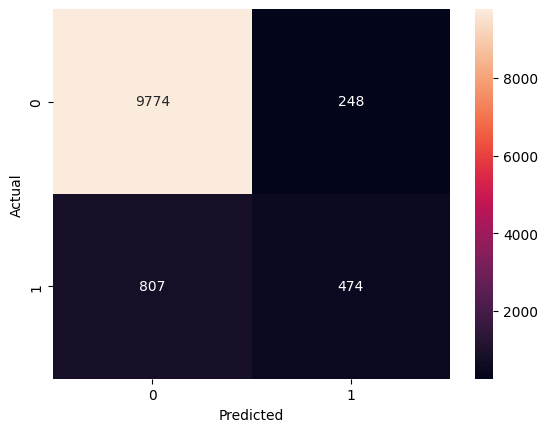

In [ ]:
y_pred2 = grid_search2.best_estimator_.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
precision_2 = precision_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
print(precision_2)
print(recall_2)
print(f1_2)

0.6565096952908587
0.3700234192037471
0.473290064902646


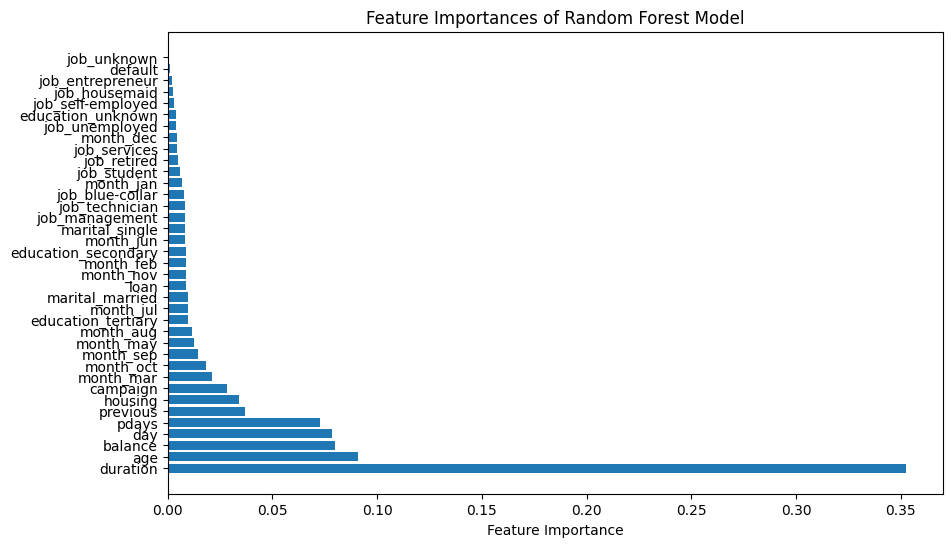

In [ ]:
# still no great scores. Not sure what I am doing wrong?
# Checking to see which features are most important
feature_importances = grid_search2.best_estimator_.feature_importances_

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances of Random Forest Model')
plt.gca().invert_yaxis()

In [ ]:
# it seems like job isn't that important for predicting the label, so going to remove that columm from the data to see if that will help with the result
data2 = data.drop('job', axis=1, inplace=True)

In [ ]:
categorical_cols2 = ['marital', 'education', 'month']
encoded_data2 = pd.get_dummies(data, columns=categorical_cols2, drop_first=True, dtype=int)

In [ ]:
encoded_data2.shape

(45211, 27)

In [ ]:
features2 = encoded_data2.drop('y', axis=1)
label2 = encoded_data2['y']

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, label2, test_size=0.25, random_state = 424)

In [ ]:
parameters = {
    'n_estimators':[50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_depth': [6, 8, 12, None],
    'min_samples_split': [4, 8, 10],
    'min_samples_leaf':[2, 4, 6]
}

grid_search3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, cv = 5)

grid_search3.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 12, None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 8, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
grid_search3.score(X_test2, y_test2)

0.908165973635318

Text(50.722222222222214, 0.5, 'Actual')

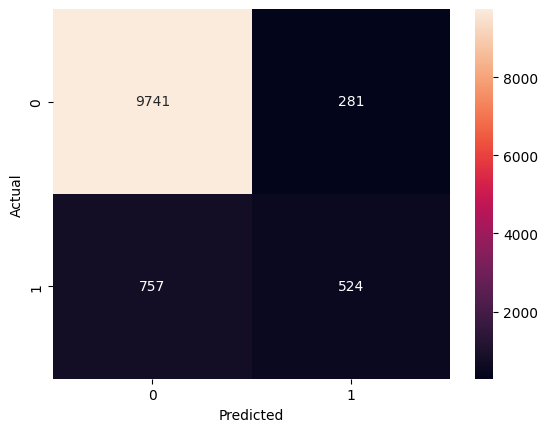

In [ ]:
y_pred3 = grid_search3.best_estimator_.predict(X_test2)

cm3 = confusion_matrix(y_test2, y_pred3)
sns.heatmap(cm3, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
precision_3 = precision_score(y_test2, y_pred3)
recall_3 = recall_score(y_test2, y_pred3)
f1_3 = f1_score(y_test2, y_pred3)
print(precision_3)
print(recall_3)
print(f1_3)

0.6509316770186335
0.4090554254488681
0.5023969319271333


In [ ]:
# Now going to work on the SVM model

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train_sample = X_train2.sample(2000, random_state=42)
y_train_sample = y_train2.loc[X_train_sample.index]



In [ ]:
SVC_parameters = {
    'C':[0.1, 1, 10],
    'kernel':['linear']
}

grid_searchSVC = GridSearchCV(estimator = SVC(), param_grid = SVC_parameters, cv = 2,  n_jobs=-1, verbose=2)
grid_searchSVC.fit(X_train_sample, y_train_sample)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']}, verbose=2)

Text(50.722222222222214, 0.5, 'Actual')

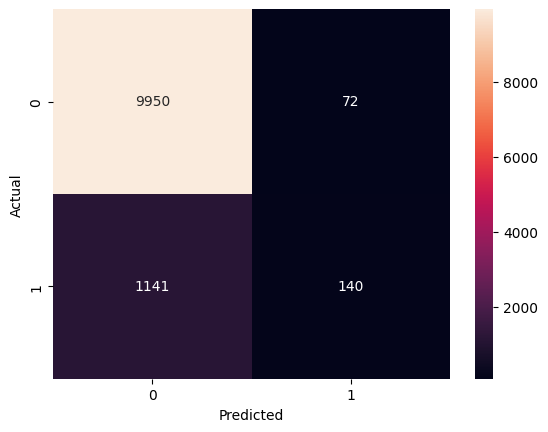

In [ ]:
# Evaluating the SVM model
from sklearn.metrics import confusion_matrix
grid_searchSVC.score(X_test2, y_test2)

y_predSVC = grid_searchSVC.best_estimator_.predict(X_test2)

cmSVC = confusion_matrix(y_test2, y_predSVC)
sns.heatmap(cmSVC, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
precision_SVC = precision_score(y_test2, y_predSVC)
recall_SVC = recall_score(y_test2, y_predSVC)
f1_SVC = f1_score(y_test2, y_predSVC)
print(precision_SVC)
print(recall_SVC)
print(f1_SVC)

0.660377358490566
0.1092896174863388
0.18754186202277295


In [ ]:
X_train_sample2 = X_train2.sample(4000, random_state=42)
y_train_sample2 = y_train2.loc[X_train_sample2.index]

SVC_parameters = {
    'C':[0.1, 1, 10],
    'kernel':['linear']
}

grid_searchSVC2 = GridSearchCV(estimator = SVC(), param_grid = SVC_parameters, cv = 2,  n_jobs=-1, verbose=2)
grid_searchSVC2.fit(X_train_sample, y_train_sample)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']}, verbose=2)

Text(50.722222222222214, 0.5, 'Actual')

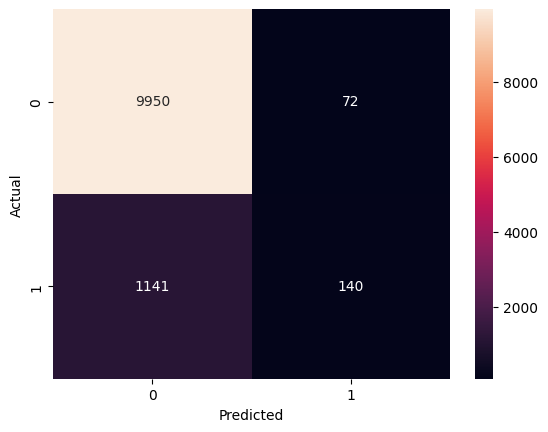

In [ ]:
y_predSVC2 = grid_searchSVC2.best_estimator_.predict(X_test2)

cmSVC = confusion_matrix(y_test2, y_predSVC2)
sns.heatmap(cmSVC, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
precision_SVC2 = precision_score(y_test2, y_predSVC2)
recall_SVC2 = recall_score(y_test2, y_predSVC2)
f1_SVC2 = f1_score(y_test2, y_predSVC2)
print(precision_SVC2)
print(recall_SVC2)
print(f1_SVC2)

0.660377358490566
0.1092896174863388
0.18754186202277295


In [ ]:
# Trying random forrest and SVC again, but without the feature 'Month' and 5000 rows

data3 = data
data3.drop('month', axis=1, inplace=True)

In [ ]:
data3

,age,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,married,tertiary,0,2143,1,0,5,261,1,-1,0,0
1,44,single,secondary,0,29,1,0,5,151,1,-1,0,0
2,33,married,secondary,0,2,1,1,5,76,1,-1,0,0
3,47,married,unknown,0,1506,1,0,5,92,1,-1,0,0
4,33,single,unknown,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,0,825,0,0,17,977,3,-1,0,1
45207,71,divorced,primary,0,1729,0,0,17,456,2,-1,0,1
45208,72,married,secondary,0,5715,0,0,17,1127,5,184,3,1
45209,57,married,secondary,0,668,0,0,17,508,4,-1,0,0


In [ ]:
# Dropping rows
class_proportions_data3 = data3['y'].value_counts(normalize=True)
rows_to_drop_per_class_data3 = class_proportions_data3 * 40000
dropped_data3 = data3.groupby('y', group_keys=False).apply(lambda x: x.sample(n=int(len(x) - rows_to_drop_per_class_data3[x.name]), random_state=42))

<ipython-input-17-052047aeb517>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropped_data3 = data3.groupby('y', group_keys=False).apply(lambda x: x.sample(n=int(len(x) - rows_to_drop_per_class_data3[x.name]), random_state=42))


In [ ]:
dropped_data3.shape

(5210, 13)

In [ ]:
categorical_cols3 = ['marital', 'education']
encoded_data3 = pd.get_dummies(dropped_data3, columns=categorical_cols3, drop_first=True, dtype=int)

In [ ]:
encoded_data3.shape

(5210, 16)

In [ ]:
features3 = encoded_data3.drop('y', axis=1)
label3 = encoded_data3['y']

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train3, X_test3, y_train3, y_test3 = train_test_split(features3, label3, test_size=0.25, random_state = 424)

In [ ]:
parameters2 = {
    'n_estimators':[50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_depth': [6, 8, 12, None],
    'min_samples_split': [4, 8, 10],
    'min_samples_leaf':[2, 4, 6]
}

grid_search4 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters2, cv = 5)

grid_search4.fit(X_train3, y_train3)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 12, None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 8, 10],
                         'n_estimators': [50, 100, 200]})

Text(50.722222222222214, 0.5, 'Actual')

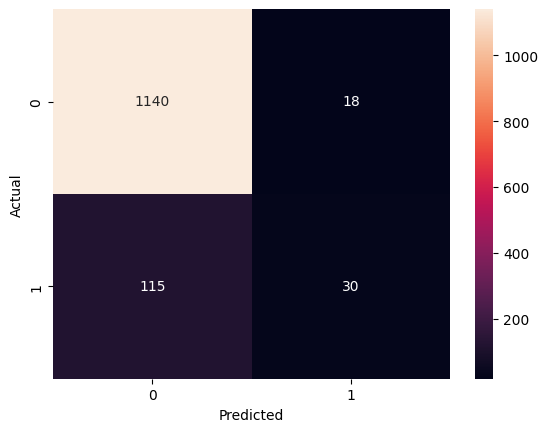

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred3 = grid_search4.best_estimator_.predict(X_test3)

cm3 = confusion_matrix(y_test3, y_pred3)
sns.heatmap(cm3, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
precision_4 = precision_score(y_test3, y_pred3)
recall_4 = recall_score(y_test3, y_pred3)
f1_4 = f1_score(y_test3, y_pred3)
print(precision_4)
print(recall_4)
print(f1_4)

0.625
0.20689655172413793
0.31088082901554404


In [ ]:
# Now seeing if SVM will give me a better score on the cut down dataset

SVC3_parameters = {
    'C':[0.1, 1, 10],
    'kernel':['linear']
}

grid_searchSVC3 = GridSearchCV(estimator = SVC(), param_grid = SVC3_parameters, cv = 2,  n_jobs=-1, verbose=2)
grid_searchSVC3.fit(X_train3, y_train3)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']}, verbose=2)

In [ ]:
from sklearn.metrics import confusion_matrix
grid_searchSVC3.score(X_test3, y_test3)

y_predSVC3 = grid_searchSVC3.best_estimator_.predict(X_test3)

precision_SVC3 = precision_score(y_test3, y_predSVC3)
recall_SVC3 = recall_score(y_test3, y_predSVC3)
f1_SVC3 = f1_score(y_test3, y_predSVC3)
print(precision_SVC3)
print(recall_SVC3)
print(f1_SVC3)

0.6052631578947368
0.15862068965517243
0.25136612021857924


Text(50.722222222222214, 0.5, 'Actual')

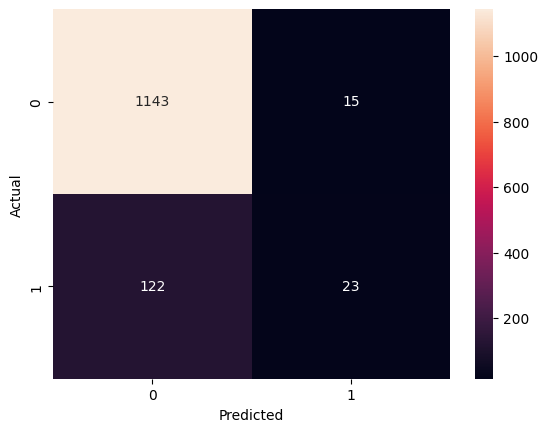

In [ ]:
cm4 = confusion_matrix(y_test3, y_predSVC3)
sns.heatmap(cm4, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
'''
################Summary####################

Random Forest Classifier Results:
1.  Score:0.9000530434165823
    Precision: 0.6407035175879398
    Recall: 0.3981264637002342
    F1 Score: 0.49109292248435243

2.  Score: 0.9052463947624525
    Precision: 0.6565096952908587
    Recall: 0.3700234192037471
    F1 Score: 0.473290064902646

**3.Score: 0.908165973635318
    Precision: 0.6509316770186335
    Recall: 0.4090554254488681
    F1 Score: 0.5023969319271333

4. Precision: 0.625
    Recall: 0.20689655172413793
    F1 Score: 0.31088082901554404


SVM Classifier Results:

1. Precision: 0.660377358490566
   Recall: 0.1092896174863388
   F1 Score: 0.18754186202277295

2. Precision: 0.660377358490566
   Recall: 0.1092896174863388
   F1 Score: 0.18754186202277295

3. Precision: 0.6052631578947368
   Recall: 0.15862068965517243
   F1 Score: 0.25136612021857924

'''